# A real Machine Learning Project
In this lecture, you will go through an example project from start to end,
as a real data scientist.

Here is an overview of all the steps you are going to deal with.

1. Frame the problem and look at the big picture
2. Get the data
3. Discover and visualize the data to gain insights
4. Prepare the data for Machine Learning Algorithms
5. Select a model and train it
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system.

## Look at the Big Picture and Frame the Problem
The dataset we are going to work with is a very famous dataset, i.e., the _California Housing Prices_ dataset.

It contains information about houses, located in a certain California district. 
It is  based on data collected from a 1990 California census.

Please note that the dataset needs to be _cleaned_. 
There are some pre-processing steps required in order to make it suitable to address a Data Mining Task.

*Attributes* 

The attributes of the dataset are rather self explanatory.

* longitude
* latitude
* housing_median_age
* total_rooms
* total_bedrooms
* population
* households
* median_income
* median_house_value
* ocean_proximity


In the earliest stages of your project you need to understand what kind of problem you are
approaching to.

In this context, you are required to build a model capable of approximating the price of houses
in a california district.

More specifically, you wish to be able to predict the price associated with any given
_block_. 

A block is a general small geographical unit.

The model you are going to train will be able to predict the median housing price of any _block_  
belonging  to the district this data refers to.

Once the overall goal is established, you can address the details of the problem at hand.

---

In a real scenario, you need to understand how your model is meant to be used.

For instance, your model may be either part of a wider pipeline or a standalone project.


For instance, let's assume the model is eventually embedded in the following pipeline.

![](img/pipeline.png)


---

**Question**

Think about the nature of the problem you are going to solve. 
What is the best way to model this problem?

*Answer*: ....


----

Once you decide how to tackle the problem, you need to find a suitable way of measuring performance of your model.

In this context, the most commonly used metrics are: options are:

> **Root Means Squared Error**
    $$
        RMSE(X,h) = \sqrt{\frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})^2}
    $$
    
> **Mean Absolute Error**
    $$
        MAE(X,h) = \frac{1}{m} \sum_{i=1}^{m} | h(x^{(i)}) - y^{(i)}|
    $$
    
Both definitions denote a way of measuring distance between vectors.
More specifically, RMSE corresponds to the *Euclidian distance* ($l_2$ norm)
while the MAE corresponds to the *Manhattan norm* ($l_1$ distance).

In general, higher norms are more sensitive to outliers.
In fact, RMSE is more sensitive to outliers if compared with MAE.

More generally the $l_k$ norm of a vector $v$ is defined as
$$
|| v_k|| = (\sum_i v_i^k)^{\frac{1}{k}}
$$

When $k$ increases it focuses more on large values.

This is one of the main reason why we 
use techniques as feature _scaling_ and _standardization_ to
enhance the performance of a training algorithm.

For example, RMSE  works better when 
the data follow a bell-shaped curve.



# Setup

In [ ]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "img")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the data

In [ ]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def maybe_fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    # check wether the dataset is already
    # in the filesytesm
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)

    # make the request to download the compressed file    
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    
    # open and decompress the file
    housing_tgz = tarfile.open(tgz_path) 
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
maybe_fetch_housing_data()

In [ ]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [ ]:
housing = load_housing_data()

## Take a Quick Look at the Data Structure


In [ ]:
housing.head()

In [ ]:
housing.info()

Some observations:

1.  ``total_bedrooms`` contains some missing values.

2. All the attributes but ``ocean_proximity`` are numerical (as suggested by the ``object`` dtype).


In fact, this feature contains text.

In [ ]:
housing["ocean_proximity"].value_counts()

The ``describe`` function provides useful information about the data distribution.

In [ ]:
housing.describe()

Clearly, plots are more appealing.

In [ ]:
# plot some graphs useful for visualizing the distribution of
# the values wrt to each individual feature
%matplotlib inline
import matplotlib.pyplot as plt


housing.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

You can draw some observations

1. ``median_income`` - draw your considerations 
2. ``median_house_age`` and ``median_house_value``  - draw your consideration

3. Look at the scales - draw your considerations 
4. Look at the shape of these distributions. Remember, RMSE works better with a bell-shaped curve.

## Create a  Test Set

It might seem weird to put aside part of the data already at this early stage.

However, it is always a good practice to put aside some of  the data point, so  to prevent a phenomena known as _data snooping bias_. 

The idea of letting the data drive the entire process is tempting, however this approach may be counter-productive.

For this reason,  you should always have a portion of the data that your algorithm has never seen before.

In [ ]:
import numpy as np
# your code here
# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

Instead of writing the function yourself, you can rely  ``sklearn``.

It comes with  a useful function for splitting your data into train and test set.

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set.shape, test_set.shape

Splitting the data is a delicate and crucial task. 

The main thing you want to avoid is to introduce: _sampling bias_.
Also, you want the data contained in the test set to be a 
__meaningful__ view on the original dataset.


**Example**
When a survey
company decides to call 1,000 people to ask them a few questions, they don’t just pick
1,000 people randomly in a phone booth. 

They try to ensure that these 1,000 people are representative of the whole population. 

For example, the US population is composed of 51.3% female and 48.7% male, so a well-conducted survey in the US would
try to maintain this ratio in the sample: 513 female and 487 male. 

This strategy is called __stratified sampling__ (more [here](https://scikit-learn.org/stable/modules/cross_validation.html#stratification)). 

In order to do stratified sampling, the whole dataset is first divided into groups, i.e., _strata_.

The sampling procedure then must guarantee that each _stratum_ has a sufficient number of sample.
Where sufficient means that there are enough data to characterize the elements belonging to that specific category.


In the scenario depicted above, a poor sampling strategy has the 12% chance of providing a strongly unbalanced, thus
not meaningful, test set. 

__Note__: ``unbalanced does not imply not-meaningful


Clearly, if we introduce bias at this stage, we compromise all the training process.

---

What does it mean for a test set to be meaningful in our California housing problem?

A meaningful test set should guarantee a sufficient number of samples for every category of households income.
(How rich people in a certain neighborhood are?)

In order to understand if the test set is well constructed, you may want to compare train set distribution with
the one of the test set.



In [ ]:
test_set.head()

In [ ]:
housing["median_income"].hist()

In [ ]:
test_set["median_income"].hist()

The distributions seem roughly equivalent.
Thus we have not introduced any bias so far, at least as far as the median income is concerned.

---

Now let's focus on a slightly different scenario. 

Suppose you already know that ``median_income`` is an important feature.

In this case you want to be sure that each value for ``median_income`` is
sufficiently represented inside the test set, i.e., you want to ensure
that each ''category'' of ``median_income``has enough samples in the the test set.

The histogram suggests that values are mostly concentrated within 2 and 5.

Therefore you want to be sure that this peculiarity persists in the 
test set.

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [ ]:
housing["income_cat"].value_counts().sort_index()

In [ ]:
housing["income_cat"].hist()

Now that you have created the categories, namely the _strata_,
you can perform a stratified sampling with 
 ``StratifiedShuffleSplit``.

Each different value for ``income_cat`` is regarded as a stratum.


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Let's see if it worked as expected

In [ ]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

In [ ]:
housing["income_cat"].value_counts() / len(housing)

In [ ]:
strat_test_set['income_cat'].hist()

In [ ]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [ ]:
compare_props

Now you may remove the ``income_cat`` feature in order to get back to the original dataset.

__Note__: In this example we assumed that ``median_income`` is an important feature for the problem in hand.
For this reason we are allowed to use a stratified sampling strategy wrt to this attribute. 

However, most of the time, you don't know which may be an important feature, therefore it is difficult to define
strata upon which performing a stratified sampling. 

__That said, you must always be aware that sampling can potentially mess up your entire project!__


In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and visualize the data to gain insights
The following stage is very important. 
In fact, plotting is probably the best way to visualize and to gain insights about your data.

Let's create a copy of the training set in order to keep everything clean. 

__Note__: We are plotting the training set. 


In [ ]:
housing = strat_train_set.copy()

In [ ]:
# scatter plot of longitude and latitude
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Pretty bad right?

Remember to be careful about the quality of your plots.

Let's change the value of ``alpha``



In [ ]:
import seaborn as sns
ax = sns.scatterplot(data=housing, x="longitude", y="latitude", alpha=0.1)
ax.annotate('Bay Area', xy=(-122.5, 38), xytext=(-124,40 ), xycoords='data',
            arrowprops=dict(facecolor='red', shrink=0.05),
            )
ax.annotate('L.A. ', xy=(-118, 34), xytext=(-120,33), xycoords='data',
            arrowprops=dict(facecolor='red', shrink=0.05),
            )
save_fig("better_visualization_plot")

Now, we are able to see that most of the houses are concentrated between the Bay Area and around the
regions of L.A. and San Diego.

Let's try to introduce other information inside the plot.

1. The price of the houses -> denoted by the color of the circle, darker is higher
2. Population of the district -> denoted by the size of the circle



In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

...fancier...

In [ ]:
import matplotlib.image as mpimg
california_img=mpimg.imread(PROJECT_ROOT_DIR + '/img/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

_Question_:
Try to draw some observation given the plot above.


## Looking for Correlations
When the dataset is not too large you can compute the *standard correlation coefficient* (also known as the Pearson's coefficient).

This coefficient quantify how much two features are correlated with each other.


In [ ]:
corr_matrix = housing.corr()

Since you are interesetd in predicting the ``median_house_value`` we can look at how much the other
features are correlated with it.

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

The coefficients range from -1 to 1. A value of -1 means there is a strong negative correlation, while a value of +1 means there is
a strong positive correlation.

The strength of the correlation gradually fade away as the coefficient approaches to $0$.

***
__Question__:

Pearson's coefficient has a major limitation. What is it?

***

Now, you might have spotted some important features. 
Let's try to focus on those features.

In [ ]:
# from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Take a look at the results.  Which is the most promising feature?

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.2)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

What can be concluded by the above plot? ......
Also, there are some strange patterns in this figure: the straight line at the top of the plot.
What is it?...

In [ ]:
housing_low_income = housing[(housing['median_income']<2) & (housing['median_house_value']==housing['median_house_value'].max()) ]
housing_low_income.head(16)

In [ ]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age", 'ocean_proximity']
sns.pairplot(housing[attributes].sample(200), hue='ocean_proximity')

## Experimenting with Attribute Combinations

One last thing you may want to do before actually preparing the data for Machine
Learning algorithms is to try to combine different attributes together.

For instance, the total number of rooms inside a district is not very useful 
unless we combine this information with the number of households in a district.

Indeed, it interesting to look at the number of rooms per household.


In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]

There are other attributes that can be treated as the ``total_rooms`` attribute.

In [ ]:
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["rooms_per_household"]
housing["population_per_household"]=housing["population"]/housing["households"]

Now, let's check if these transformations bring any improvement to the correlation matrix.


In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

Not bad! The new attributes are more correlated than the original counterparts.


### Recap
Keep in mind that gaining insights from the plots, making assumptions based on the data is good. 
However it is an __iterative__ process. 

After you have built a prototype of your model, it is always good to go back and explore different paths.


# Prepare the data for Machine Learning algorithms
First, you need to separate the Xs from the ys.

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

## Data Cleaning
We know from the previous section there are missing data we need to take care of.

``total_bedroom`` has missing values.
We can decide wether to fill these values or to drop the entries associated with them.

This time, we decide to replace the missing values with the median.


In [ ]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

In [ ]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

Another way of replacing missing values in a dataset is via the class
``Imputer`` of ``sklearn``.



In [ ]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")

Remove the attributes containing text because the median can only be computed wrt numerical attributes:

In [ ]:
#housing_num = housing.drop('ocean_proximity', axis=1)
housing_num = housing.select_dtypes(include=[np.number])
housing_num.head()

Now you can fit the imputer instance to the training data using the ``fit()`` method:

In [ ]:
imputer.fit(housing_num)

In [ ]:
imputer.statistics_

At this point the imputer, after the call to the  ``fit`` method, has only computed
the values for for replacing potential NaN in the dataset.

The NaN are still in the dataset at this point!

Also, the median is compute wrt to every attribute in the dataset. 
Even though we have missing values only in ``total_bedrooms`` it is preferable to define
a replace strategy for every attribute, as it may happen that, at some point, there are missing values in 
other fields of the dataset.

So we are taking precautions!

Check that this is the same as manually computing the median of each attribute.

In [ ]:
housing_num.median().values

The imputer is trained. It can be used to modify the dataset.


In [ ]:
X = imputer.transform(housing_num)

The result is a plain Numpy array containing the transformed features. 
If you want a pandas dataframe again:


In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index = list(housing.index.values))

In [ ]:
housing_tr.loc[sample_incomplete_rows.index.values]

---
**Aside: Scikit-Learn Design**

Here are some of the main design princoples of the Scikit-Learn's API


* **Consistency**. All objects share a consistent and simple interface
    * *Estimators* - Any object that can estimate some parameters based on a dataset
       is called an estimator (e.g., an imputer is an estimator). The estimation itself is
       performed by the fit() method, and it takes only a dataset as a parameter (or
       two for supervised learning algorithms; the second dataset contains the
       labels). Any other parameter needed to guide the estimation process is con
       sidered a hyperparameter (such as an imputer ’s strategy ), and it must be set
       as an instance variable (generally via a constructor parameter).
    * *Transformers* - Some estimators (e.g., the imputer) can also transfom a dataset. 
       The transformation is performed by the ``transform()`` method with the dataset to
       transform as a parameter. It returns the transformed dataset.
       
       All the transformer also have a convenient method called ``fit_transform()`` which performs
       both the fit and the transform stages in a single step.
    * *Predictors* - some estimators are capable of making predictions given a dataset (e.g., ``LinearRegression``).
        A predictor has a ``predict()`` method that takes a
        dataset of new instances and returns a dataset of corresponding predictions. It
        also has a ``score()`` method that measures the quality of the predictions given
        a test set
        
* **Inspection** - All the estimator’s hyperparameters are accessible directly via public
    instance variables (e.g., ``imputer.strategy`` ), and all the estimator’s learned
    parameters are also accessible via public instance variables with an underscore
    suffix (e.g., ``imputer.statistics_``)     
    
* **Nonproliferation** of classes. Datasets are represented as NumPy arrays or SciPy
sparse matrices, instead of homemade classes. Hyperparameters are just regular
Python strings or numbers.

* **Composition**. Existing building blocks are reused as much as possible. For
example, it is easy to create a Pipeline estimator from an arbitrary sequence of
transformers followed by a final estimator, as we will see.

* **Sensible defaults**. Scikit-Learn provides reasonable default values for most
parameters, making it easy to create a baseline working system quickly.

---

### Handling Text and Categorical Attributes
Now let's preprocess the categorical input feature, `ocean_proximity`:

In [ ]:
housing_cat = housing.select_dtypes(include=['object'])
housing_cat.head(10)

sklearn provides a class for transforming categorical values into numerical values.

In [ ]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20

In [ ]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

In [ ]:
print(ordinal_encoder.categories_)

This is not the best way to treat categorical data, though.

In fact one issue that may occur is that ML algorithm will assume that two close values have a similar meaning.

This is not always the case, especially in our context. 

In fact the fact  "<1H OCEAN" and "INLAND" are not similar at all, despite their close corresponding numerical values.

For this reason it is always better to transform categorical values according to a one-hot-encoding strategy.

Of course, ``sklearn`` provides a transformer: the ``OneHotEncoder``.

In [ ]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array  by calling  `toarray()`:

In [ ]:
housing_cat_1hot.toarray()

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [ ]:
print(cat_encoder.categories_)

Let's create a custom transformer to add extra attributes:

In [ ]:
housing.columns

## Custom Transformers

Although Scikit-Learn provides many useful transformers, 
sometimes you may need to write your own transformer.


You want your transformer to work seamlessly with Scikit-Learn functionalities (such as pipelines), and
since Scikit-Learn relies on duck typing (not inheritance), all you need is to create a class and implement three methods: ``fit()``
(returning ``self`` ), ``transform()`` , and ``fit_transform()``.

You can get the last one for
free by simply adding TransformerMixin as a base class. Also, if you add BaseEstimator as a base class 
(and avoid ``*args`` and ``**kargs`` in your constructor) you will get
two extra methods ( ``get_params()`` and ``set_params()``) that will be useful for automatic hyperparameter tuning. 
For example, here is a small transformer class that adds
the combined attributes we discussed earlier:

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            #np.c_ concatenates arrays
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


In [ ]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)
housing_extra_attribs = attr_adder.transform(housing.values)
pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+['roomsPerHouseHolds', 'PopulationPerHouseholds', 'bedRoomsPerRoom']).head()

Alternatively, you can use Scikit-Learn's `FunctionTransformer` class which lets you easily create a transformer based only on a function. 

Note that we need to set `validate=False` because the data contains non-float values (`validate` by default is `False` in Scikit-Learn 0.22).

In [ ]:
from sklearn.preprocessing import FunctionTransformer # it works as a wrapper

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [ ]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

## Feature Scaling
There are two common strategies:
1. MinMax Scaling
2. Standardization
ML algorithms prefer input data with the same scale.
Otherwise, the performance of the algorithm can be altered.



In [ ]:
housing_num.describe()

Scikit-Learn provides two transformers: (i)``MinMaxScaler``, (ii) ``StandardScaler``.

Like other transformers they provide the same ``fit()``-> ``transform()`` mechanism.



## Transformation Pipelines
A  best practice when working with transformers or imputer is to define Pipelines
of transformations.

Scikit-Learn provides the Pipeline class.

Here is a small pipeline for the numerical attributes:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
housing_num_tr

The Pipeline constructor takes a list of <name,estimator> pairs defining a sequence of
steps. 

Every object in a pipeline, except the last one, must be a transformer.

The last spot of the pipeline is usually dedicated to either an estimator or a predictor.


Calling ``fit()`` on the pipeline implies the call to ``fit_transform()`` on every
object in the pipeline, sequentially.

The output of a transformer becomes the input to the next object in the pipeline,
until the end of the pipeline is reached.

So far, we implemented a pipeline for the numerical values.
However we have to deal also with not-numerical values.

A possible approach is to design two different pipelines, one for each type of values and
then using a ``ColumnTransformer``.

*How does it work?*
This Transformer enables the possibility of applying each transformer (or another Pipeline) 
to a specific subset of column.

Then the result is merged in  a single feature space.

A ``ColumnTransformer`` asks for a list of tuples.

Each tuple in the list contains: the name of the transformer, the transformer, the column(s) upon which the transformations
need to be performed.

In [ ]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

In [ ]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
housing_prepared

# Select and train a model 

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

Done! You now have a working Linear Regression model.

It is not so hard, is it? 

Let's use the regressor to make some prediction.

In [ ]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
# the data need to be transformed according to the same pipeline used for the training set
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Compare it against the actual values:

In [ ]:
print("Labels:", list(some_labels))

In [ ]:
some_data_prepared

It works. 

However, we still do not know how good this model actually is.

A classic approach when working with regression problem is to use the RMSE error in order to measure
its performace.

In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

Well, it is not a great score considering that the ``median_housing_values`` ranges between 120k and 265k.

Now, compute some other metric over the training set ($l_1$ loss function).

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

Usually, if a model yield poor performance, the first thing to do is to try with another model.


(Obviously, you first need to check if your results are correct, i.e., you are not messed up with something in your model or with the data preparation stack)

Why don't you try with ``DecisionTreeRegressor``?

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

Wow! 0 error! 

Should you be worried about this result or should you be happy for it?  Are you the legit ML GOAT?

## Better Evaluation Using Cross-Validation
A better way to evaluate the performance of a model during the training phase
is to use cross-validation, as it returns more reliable measures.

One way to evaluate the Decision Tree model would be to use the train_test_split
function to split the training set into a smaller training set and a validation set, then
train your models against the smaller training set and evaluate them against the validation set. 
It’s a bit of work, but nothing too difficult and it would work fairly well.

A great alternative is to use Scikit-Learn’s cross-validation feature. The following code
performs K-fold cross-validation: it randomly splits the training set into 10 distinct
subsets called folds, then it trains and evaluates the Decision Tree model 10 times,
picking a different fold for evaluation every time and training on the other 9 folds.
The result is an array containing the 10 evaluation scores:

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

print("Scores:", rmse_scores)
print("Mean: ", rmse_scores.mean())
print("Std.: ", rmse_scores.std())

Scikit-Learn cross-validation features expects a utility function
(greater is better) rather than a cost function (lower is better), this is why you need
to stick the negative sign.

Now the Decision Tree doesn’t look as good as it did earlier.

In fact, it seems to be worse than the Linear Regression model! 

Notice that cross-validation allows you to get not only an estimate of the performance of your model,
but it also measures the consistency of your model as the standard deviation of its performance.

Now let's do the same thing with the linear regression estimator.

In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Std.: ", scores.std())


print_scores(lin_rmse_scores)

#### Draw some conclusions...


Let's try something new. Here your are going to build a ``RandomForestRegressor`` (it is the ``ensamble`` module of sklearn).

It is an Ensamble Learning Method. 

**Note**: you need to specify `n_estimators=10` to avoid a warning about the fact that the default value is going to change to 100 in Scikit-Learn 0.22.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

In [ ]:
# compute some predictions
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

In [ ]:
# compute the score of the model
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print_scores(forest_rmse_scores)

**Question**

Is there any sign of overfitting?

*Motivate your answer*...



## Fine-Tune Your Model
After you tried a number of different solutions, you end up with a short list of promising models.

The goal is now to try to boost their performance via parameter tuning.


### Grid Search

You  want Scikit-Learn’s ``GridSearchCV`` to search the best configuration for you.

For example, the following code aims at finding  the best combination
of hyperparameters  for the RandomForestRegressor.

It should be noted that each dict  in ``param_grid`` is considered only once. 
Therefore each dict in the list corresponds to a configuration for the algorithm.

Sklearn also considers every possible combination of the selected parameters for the given model, therefore
it might required a lot of time!

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

Once the grid search has done, you get the best hyperparameters combination with:

In [ ]:
grid_search.best_params_

You can also take a reference directly to the best estimator.

In [ ]:
grid_search.best_estimator_

Let's look at the scores of each hyperparameter combination tested during the grid search:

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
pd.DataFrame(grid_search.cv_results_).head()

## Randomized Search
Instead of providing each possible combination by hand,
 you can use ``RandomizedSearchCV``.

It is especially useful when you have a lot of hyperparameters, each of which may vary in an large range.

It evaluates a given number of random combinations by selecting a random
value for each hyperparameter at every iteration. This approach has two main
benefits:
1. 1.000 iterations will corresponds to 1000 different combination for each hyperparameter
2. you have more control over the amount of resources you want to allocate

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=11),
        'max_features': randint(low=1, high=3),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

## Analyze the Best Models and Their Errors
the RandomForestRegressor is able to indicate the relative importance of each feature.


In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

Let’s display these importance scores next to their corresponding attribute names:

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

With this information in mind, you might want to revisit some of the steps you have included in yours pipeline.

For instance, you may want to try dropping some of the less useful features.
(e.g., apparently only one ocean_proximity category is really useful, so you could try
dropping the others).

---
### Evaluate Your System on the Test Set 
Training performance measures how good you model is in terms of __approximation__.

However, your ultimate goal is to provide a model that is as good as possible in terms of __generalization__.

However, the real test is performed against the test set. 

Hopefully, the best test on the training data will be the same as the one on the test set.

__Careful: Performance reported on the test must no affect the decision process when choosing the final model!__

You can take the ``full_pipeline`` we build before, as it is already trained, and call
the ``transform`` method in order to transform the data in the test set.

**Note:** Be careful! You need to transform the data according to the same parameters of the transformer objects
obtained during the training stage. 
__If you call fit upon the test set, it is an error!__

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test) #!!!!!!!!! do not call fit or fit_transform!
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

**What to expect from this evaluation?**

The performance should roughly match the ones obtained using cross validation.

This is not the case, but if that happens, you must avoid the trap of trying to fit the data
in the test set, usually the boost in performance will actually be a ''fake" improvement, since your model
will likely fail to generalize to new data.


# Extra material

## A full pipeline with both preparation and prediction


In [ ]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

## Model persistence using joblib
One the training phase is done, it is
better to save your progresses, i.e., your trained model.

Scikit-Learn provides the module ``joblib`` for easily 
save and restore  python objects in a regular .pickle file.

You should always prefer ``joblib`` over other serialization
techniques, as it is generally more efficient.


In [ ]:
my_model = full_pipeline_with_predictor

from sklearn.externals import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF
 



## 1
Let's train a support vector machine regressor mode (`sklearn.svm.SVR`).
It has several parameters, e.g., `kernel="linear|rbf"` and others (see the doc file).

Find the best possible configuration via parameter tuning.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search.fit(housing_prepared, housing_labels)

The best model achieves the following score (evaluated using 5-fold cross validation):

In [ ]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

It should be worse than the `RandomForestRegressor`. 
Let's check the best hyperparameters found:

In [ ]:
grid_search.best_params_

## 2.

Replace `GridSearchCV` with `RandomizedSearchCV`.

In [100]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=5, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=4, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=5, n_jobs=4,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x131900e50>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x13199cfd0>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

The best model achieves the following score (evaluated using 5-fold cross validation):

In [101]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

65034.05830317045

Now this is much closer to the performance of the `RandomForestRegressor` (but not quite there yet). Let's check the best hyperparameters found:

In [102]:
rnd_search.best_params_

{'C': 26290.206464300216, 'gamma': 0.9084469696321253, 'kernel': 'rbf'}

This time we ended up with RBF being the best choice for the kernel function.

Randomized search tends to find better hyperparameters than grid search.

Let's look at the exponential distribution we used, with `scale=1.0`. Note that some samples are much larger or smaller than 1.0, but when you look at the log of the distribution, you can see that most values are actually concentrated roughly in the range of exp(-2) to exp(+2), which is about 0.1 to 7.4.

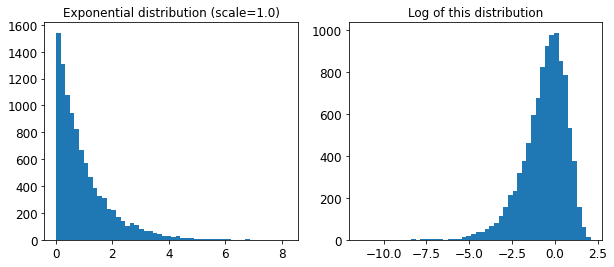

In [103]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The distribution we used for `C` looks quite different: the scale of the samples is picked from a uniform distribution within a given range, which is why the right graph, which represents the log of the samples, looks roughly constant. This distribution is useful when you don't have a clue of what the target scale is:

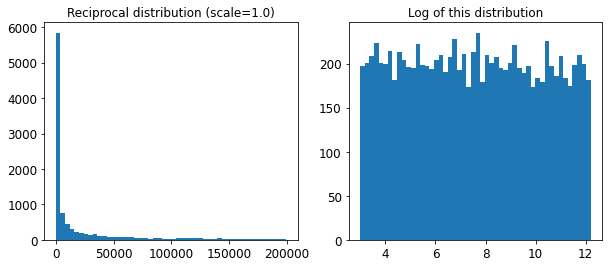

In [104]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The reciprocal distribution is useful when you have no idea what the scale of the hyperparameter should be (indeed, as you can see on the figure on the right, all scales are equally likely, within the given range), whereas the exponential distribution is best when you know (more or less) what the scale of the hyperparameter should be.

## 3.

Add a new transformer into the preparation pipeline. 
It selects the most important attributes.

The feature importance scores can be computed by any estimator object (e.g., the ``Random Forest Regressor``).

It is always better to provide the scores to the transformer, as opposed to let it compute them at every stage of training.

In [105]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

Let's define the number of top features we want to keep:

In [106]:
k = 5

Now let's look for the indices of the top k features:

In [107]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  7,  9, 10, 12])

In [108]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'median_income', 'pop_per_hhold', 'bedrooms_per_room',
       'INLAND'], dtype='<U18')

Let's double check that these are indeed the top k features:

In [109]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.31498981654442865, 'median_income'),
 (0.16102983971113785, 'INLAND'),
 (0.10927744833331542, 'pop_per_hhold'),
 (0.09850366376132488, 'bedrooms_per_room'),
 (0.07241936267111387, 'longitude')]

Looking good!
Now you can create a new pipeline which includes the ``TopFeatureSelector``.

In [110]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [111]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

Let's look at the features of the first 3 instances:

In [112]:
housing_prepared_top_k_features[0:3]

array([[-0.94135046, -0.8936472 ,  0.00622264, -0.12236839,  1.        ],
       [ 1.17178212,  1.292168  , -0.04081077, -0.76455102,  0.        ],
       [ 0.26758118, -0.52543365, -0.07537122, -0.32454514,  1.        ]])

Now let's double check that these are indeed the top k features:

In [114]:
housing_prepared[0:3, top_k_feature_indices]

array([[-0.94135046, -0.8936472 ,  0.00622264, -0.12236839,  1.        ],
       [ 1.17178212,  1.292168  , -0.04081077, -0.76455102,  0.        ],
       [ 0.26758118, -0.52543365, -0.07537122, -0.32454514,  1.        ]])

Everything's correct!

## 4.

Create a single pipeline responsible of the following steps:
1. preparation
2. feature selection
3. training of a model of your choice (``SVR``)

In [115]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [116]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('attribs_adder',
                                                                   FunctionTransformer(func=<function add_extra_features at 0x130de7310>)),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'house

Let's try the full pipeline on a few instances:

In [117]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 78482.05832018 292717.95095184  86791.45725513 147614.05637917]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0]
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   8.7s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  18.0s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  17.8s
[CV] END C=432.37884813148855, gamma=0.15416196746656105, kernel=linear; total time=   8.7s
[CV] END C=432.37884813148855, gamma=0.15416196746656105, kernel=linear; total time=   8.0s
[CV] END C=24.17508294611391, gamma=3.503557475158312, kernel=rbf; total time=  15.7s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   8.7s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  18.0s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, kernel=rbf; total time=  15.4s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, kernel=rbf; to

The full pipeline works fine. 

You can try a separate pipeline with a more powerful model like the ``RandomForestRegressor``.
